# Homework 2
## MSDS-7337: Natural Language Processing
## Author: Taylor Bonar
---
1.	In Python, create a method for scoring the vocabulary size of a text, and normalize the score from 0 to 1. It does not matter what method you use for normalization as long as you explain it in a short paragraph. 
Some relevant resources that you can leverage:
* https://docs.tibco.com/pub/spotfire/6.5.0/doc/html/norm/norm_scale_between_0_and_1.htm
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


In [50]:
import nltk, sklearn
import numpy as np
from platform import python_version

nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)

print(f"Python Version: {python_version()}")
print(f"NLTK v.{nltk.__version__}")
print(f"Numpy v.{numpy.__version__}")
print(f"Scikit-Learn v.{sklearn.__version__}")

Python Version: 3.8.3
NLTK v.3.5
Numpy v.1.18.5
Scikit-Learn v.0.23.1


In [101]:
def vocab_size(nltk_text_obj):
    """
    :param nltk_text_object: nltk.text.Text object to calculate unique vocab size
    :return: integer of all unique words that are not punctuation or capitalized differently
    """
    return len(set(word.lower() for word in nltk_text_obj if word.isalpha()))

def lexical_diversity(text):
    """
    Returns "lexical richness" of an NLTK object
    
    Lexical diversity score is simply: word types / tokens
    
    Where tokens are a sequence of characters (e.g., punctuation, text emojis, words, etc.)
    Where types are "word types" (i.e., form or spelling of the word independently of its specific occurences in text; TLDR: actual words)
    
    :param text: NLTK text object
    :return: percentage of unique words to the total number of words
    """
    tokens = len(text)
    types = len(set(text))
    return types / tokens

In [111]:
from nltk.corpus import gutenberg as gb

def corpus_dict():
    """Returns a dictionary for nltk.corpus.gutenberg w/ statistics based on corpus reader functions. Refer to https://www.nltk.org/api/nltk.corpus.html for corpus reader functions"""
    corpus_dict = {}

    for fileid in gb.fileids():

        corpus_dict[fileid] = {}
        corpus_dict[fileid]["num_vocab"] = vocab_size(gb.words(fileid))
        corpus_dict[fileid]["num_chars"] = len(gb.raw(fileid))
        corpus_dict[fileid]["num_words"] = len(gb.words(fileid))  # i.e., tokens
        corpus_dict[fileid]["num_sents"] = len(gb.sents(fileid))  # length of encoding of sentences list
        corpus_dict[fileid]["avg_word_length"] = round(len(gb.raw(fileid)) / len(gb.words(fileid)))
        corpus_dict[fileid]["avg_sent_length"] = round(len(gb.words(fileid)) / len(gb.sents(fileid)))
        corpus_dict[fileid]["avg_mode_vocab"] = round(len(gb.words(fileid)) / corpus_dict[fileid]["num_vocab"])
        corpus_dict[fileid]["lexical_diversity"] = lexical_diversity(gb.raw(fileid))
                                    
    return corpus_dict

In [114]:
gb_corpus_stat_dict = corpus_dict()

In [199]:
from pprint import pprint

pprint(list(gb_corpus_stat_dict.items())[1])


gb_df1 = pd.DataFrame.from_dict(gb_corpus_stat_dict, orient="index").reset_index()

gb_df1.head()

('austen-persuasion.txt',
 {'avg_mode_vocab': 17,
  'avg_sent_length': 26,
  'avg_word_length': 5,
  'lexical_diversity': 0.0001672771568030333,
  'num_chars': 466292,
  'num_sents': 3747,
  'num_vocab': 5739,
  'num_words': 98171})


,index,num_vocab,num_chars,num_words,num_sents,avg_word_length,avg_sent_length,avg_mode_vocab,lexical_diversity
0,austen-emma.txt,7079,887071,192427,7752,5,25,27,0.000087
1,austen-persuasion.txt,5739,466292,98171,3747,5,26,17,0.000167
2,austen-sense.txt,6283,673022,141576,4999,5,28,23,0.000116
3,bible-kjv.txt,12568,4332554,1010654,30103,4,34,80,0.000017
4,blake-poems.txt,1510,38153,8354,438,5,19,6,0.001913


In [130]:
from sklearn.preprocessing import MinMaxScaler

def get_normalized_score_of_corpus_vocab_size(stat_dict):

    # Create 
    vocab_size_array = np.array(sorted([val["num_vocab"] for key, val in gb_corpus_stat_dict.items() if "num_vocab" in val])).reshape(-1,1)
    
    min_max_scaler = MinMaxScaler()
    return min_max_scaler.fit_transform(vocab_size_array)
    
    
normalized_vocab_size = get_normalized_score_of_corpus_vocab_size(gb_corpus_stat_dict)

print(normalized_vocab_size)

[[0.00000000e+00]
 [7.12527529e-04]
 [6.85969685e-02]
 [9.74219458e-02]
 [1.25469620e-01]
 [1.50019433e-01]
 [2.06568208e-01]
 [2.73934447e-01]
 [3.09172173e-01]
 [3.10273351e-01]
 [3.60733256e-01]
 [4.03355357e-01]
 [4.30560953e-01]
 [4.40795440e-01]
 [4.83547092e-01]
 [7.00479337e-01]
 [7.16284493e-01]
 [1.00000000e+00]]


In [202]:
def get_normalized_scores_from_df(df):

    min_max_scaler = MinMaxScaler()
    df[["num_vocab"]] = min_max_scaler.fit_transform(df[["num_vocab"]])
    return df

normalized_df = get_normalized_scores_from_df(gb_df1)

normalized_df.head()

,index,num_vocab,num_chars,num_words,num_sents,avg_word_length,avg_sent_length,avg_mode_vocab,lexical_diversity
0,austen-emma.txt,0.360733,887071,192427,7752,5,25,27,0.000087
1,austen-persuasion.txt,0.273934,466292,98171,3747,5,26,17,0.000167
2,austen-sense.txt,0.309172,673022,141576,4999,5,28,23,0.000116
3,bible-kjv.txt,0.716284,4332554,1010654,30103,4,34,80,0.000017
4,blake-poems.txt,0.000000,38153,8354,438,5,19,6,0.001913


2.	After consulting section 3.2 in chapter 1 of Bird-Klein, create a method for scoring the long-word vocabulary size of a text, and likewise normalize (and explain) the scoring as in step 1 above.

In [195]:
def corpus_long_dict():
    """Returns a dictionary for nltk.corpus.gutenberg w/ statistics based on corpus reader functions. Refer to https://www.nltk.org/api/nltk.corpus.html for corpus reader functions"""
    corpus_dict = {}

    for fileid in gb.fileids():

        corpus_dict[fileid] = {}
        corpus_dict[fileid]["num_vocab"] = vocab_size(gb.words(fileid))
        corpus_dict[fileid]["num_chars"] = len(gb.raw(fileid))
        corpus_dict[fileid]["num_words"] = len(gb.words(fileid))  # i.e., tokens
        corpus_dict[fileid]["num_sents"] = len(gb.sents(fileid))  # length of encoding of sentences list
        corpus_dict[fileid]["avg_word_length"] = round(len(gb.raw(fileid)) / len(gb.words(fileid)))
        corpus_dict[fileid]["avg_sent_length"] = round(len(gb.words(fileid)) / len(gb.sents(fileid)))
        corpus_dict[fileid]["avg_mode_vocab"] = round(len(gb.words(fileid)) / corpus_dict[fileid]["num_vocab"])
        corpus_dict[fileid]["lexical_diversity"] = lexical_diversity(gb.raw(fileid))
        
        # Long word stats
        long_words_list = set(word.lower() for word in gb.words(fileid) if word.isalpha() and len(word) > 7)
        corpus_dict[fileid]['num_long_words_vocab'] = len(long_words_list)
        corpus_dict[fileid]['long_word_lex'] = corpus_dict[fileid]['num_long_words_vocab'] / corpus_dict[fileid]["num_words"]
                                    
    return corpus_dict


gb_corpus_stat_dict_2 = corpus_long_dict()
        
pprint(list(gb_corpus_stat_dict_2.items())[1])

gb_df2 = pd.DataFrame.from_dict(gb_corpus_stat_dict_2, orient="index").reset_index()

gb_df2.head()

('austen-persuasion.txt',
 {'avg_mode_vocab': 17,
  'avg_sent_length': 26,
  'avg_word_length': 5,
  'lexical_diversity': 0.0001672771568030333,
  'long_word_lex': 0.026677939513705676,
  'num_chars': 466292,
  'num_long_words_vocab': 2619,
  'num_sents': 3747,
  'num_vocab': 5739,
  'num_words': 98171})


,index,num_vocab,num_chars,num_words,num_sents,avg_word_length,avg_sent_length,avg_mode_vocab,lexical_diversity,num_long_words_vocab,long_word_lex
0,austen-emma.txt,7079,887071,192427,7752,5,25,27,0.000087,3314,0.017222
1,austen-persuasion.txt,5739,466292,98171,3747,5,26,17,0.000167,2619,0.026678
2,austen-sense.txt,6283,673022,141576,4999,5,28,23,0.000116,2964,0.020936
3,bible-kjv.txt,12568,4332554,1010654,30103,4,34,80,0.000017,5020,0.004967
4,blake-poems.txt,1510,38153,8354,438,5,19,6,0.001913,196,0.023462


In [196]:
def get_normalized_score_of_corpus_long_vocab_size(stat_dict):

    # Create 
    vocab_size_array = np.array(sorted([val["num_long_words_vocab"] for key, val in stat_dict.items() if "num_long_words_vocab" in val])).reshape(-1,1)
    
    min_max_scaler = MinMaxScaler()
    return min_max_scaler.fit_transform(vocab_size_array)

normalized_long_vocab_size = get_normalized_score_of_corpus_long_vocab_size(gb_corpus_stat_dict_2)

print(normalized_long_vocab_size)

[[0.        ]
 [0.0106383 ]
 [0.05634358]
 [0.06146572]
 [0.07827686]
 [0.08536906]
 [0.13790386]
 [0.2906488 ]
 [0.31822958]
 [0.36354085]
 [0.36643026]
 [0.39624376]
 [0.4095088 ]
 [0.41161019]
 [0.42947203]
 [0.5940373 ]
 [0.63356974]
 [1.        ]]


In [197]:
def get_normalized_scores_from_dict(stat_dict):

    # Create 
    vocab_size_array = np.array(sorted([val["num_long_words_vocab"] for key, val in stat_dict.items() if "num_long_words_vocab" in val])).reshape(-1,1)
    
    min_max_scaler = MinMaxScaler()
    return min_max_scaler.fit_transform(vocab_size_array)

normalized_long_vocab_size = get_normalized_score_of_corpus_long_vocab_size(gb_corpus_stat_dict_2)

print(normalized_long_vocab_size)

[[0.        ]
 [0.0106383 ]
 [0.05634358]
 [0.06146572]
 [0.07827686]
 [0.08536906]
 [0.13790386]
 [0.2906488 ]
 [0.31822958]
 [0.36354085]
 [0.36643026]
 [0.39624376]
 [0.4095088 ]
 [0.41161019]
 [0.42947203]
 [0.5940373 ]
 [0.63356974]
 [1.        ]]


In [198]:
def get_normalized_scores_from_df(df):

    min_max_scaler = MinMaxScaler()
    df[["num_vocab","num_long_words_vocab"]] = min_max_scaler.fit_transform(df[["num_vocab","num_long_words_vocab"]])
    return df

normalized_df2 = get_normalized_scores_from_df(gb_df2)

normalized_df2.head()

,index,num_vocab,num_chars,num_words,num_sents,avg_word_length,avg_sent_length,avg_mode_vocab,lexical_diversity,num_long_words_vocab,long_word_lex
0,austen-emma.txt,0.360733,887071,192427,7752,5,25,27,0.000087,0.409509,0.017222
1,austen-persuasion.txt,0.273934,466292,98171,3747,5,26,17,0.000167,0.318230,0.026678
2,austen-sense.txt,0.309172,673022,141576,4999,5,28,23,0.000116,0.363541,0.020936
3,bible-kjv.txt,0.716284,4332554,1010654,30103,4,34,80,0.000017,0.633570,0.004967
4,blake-poems.txt,0.000000,38153,8354,438,5,19,6,0.001913,0.000000,0.023462


3.	Now create a “text difficulty score” by combining the lexical diversity score from homework 1, and your normalized score of vocabulary size and long-word vocabulary size, in equal weighting. Explain what you see when this score is applied to same graded texts you used in homework 1.

In [207]:
normalized_df3 = gb_df2.copy()

min_max_scaler = MinMaxScaler()
normalized_df3[["lexical_diversity","num_vocab","num_long_words_vocab"]] = min_max_scaler.fit_transform(gb_df2[["lexical_diversity","num_vocab","num_long_words_vocab"]])

normalized_df3.head()

In [207]:
metrics_df = normalized_df3[["index","lexical_diversity","num_vocab","num_long_words_vocab"]]

metrics_df.head()

,index,lexical_diversity,num_vocab,num_long_words_vocab
0,austen-emma.txt,0.036651,0.360733,0.409509
1,austen-persuasion.txt,0.079095,0.273934,0.318230
2,austen-sense.txt,0.051995,0.309172,0.363541
3,bible-kjv.txt,0.000000,0.716284,0.633570
4,blake-poems.txt,1.000000,0.000000,0.000000


In [208]:
metrics_df["sum_score"] = metrics_df["lexical_diversity"] + metrics_df["num_vocab"] + metrics_df["num_long_words_vocab"]
metrics_df["mult_score"] = metrics_df["lexical_diversity"] * metrics_df["num_vocab"] * metrics_df["num_long_words_vocab"]

metrics_df.head()

,index,lexical_diversity,num_vocab,num_long_words_vocab,sum_score,mult_score
0,austen-emma.txt,0.036651,0.360733,0.409509,0.806893,0.005414
1,austen-persuasion.txt,0.079095,0.273934,0.318230,0.671259,0.006895
2,austen-sense.txt,0.051995,0.309172,0.363541,0.724708,0.005844
3,bible-kjv.txt,0.000000,0.716284,0.633570,1.349854,0.000000
4,blake-poems.txt,1.000000,0.000000,0.000000,1.000000,0.000000


Text(0, 0.5, 'Normalized Score')

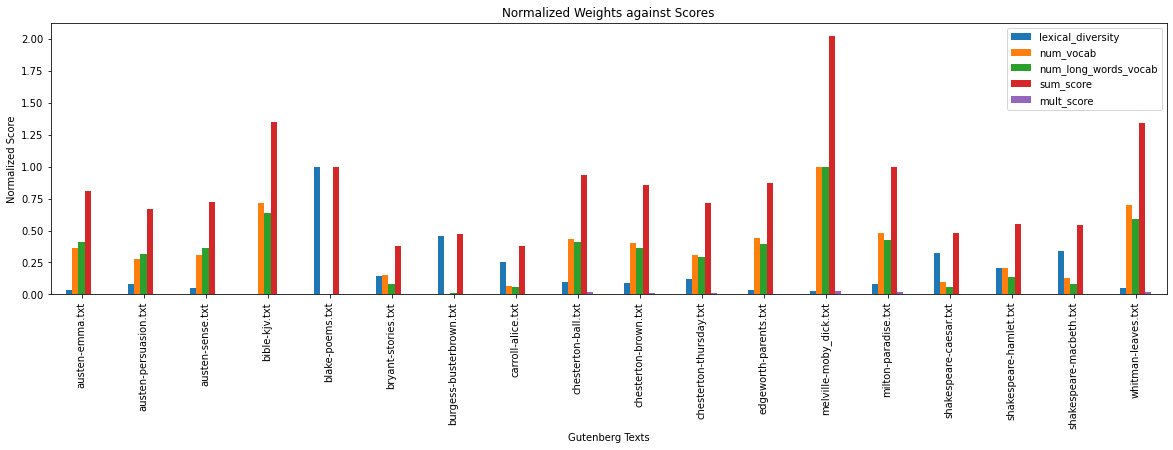

In [218]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
ax = metrics_df.plot(x="index",
               y=["lexical_diversity","num_vocab","num_long_words_vocab", "sum_score", "mult_score"],
               kind="bar",
               title="Normalized Weights against Scores")
ax.set_xlabel("Gutenberg Texts")
ax.set_ylabel("Normalized Score")

With the addition of number long words vocabulary (words with length greater than 7), we can see that against the typical vocabular size, the size does not differ too much between our various texts. This little change may show redundancies in analyzing the differences between vocabulary in general, and length of a word fo vocabulary.

However, if we examine the summation and multiplication scores of the combined normalized weights, we see a variation. For example on Melville's Moby Dick text, we see the summation score of the combined weights is quite high but a low multplication score. Although looking closer at the data, it seems the multiplication score suffered from the low lexical diversity between the various texts.

Additionally, I question if using the MinMaxScaler is ideal for attempting to equalize the various metrics across the board as we obtain difficulties that are rather low or none on multiplication scores, e.g., Blake's poems.